In [107]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math
import sympy as sp
from sympy.solvers import solve

%matplotlib inline

mean = 3.644444444444444, median = 3.9
std = 0.7410369778014696, q1 = 3.2, q3 = 4.2


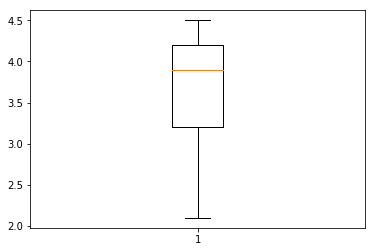

grade required to pass: 4.700000000000002


In [19]:
#1a)
grades = [3.2, 4.2, 4.1, 2.8, 3.8, 4.2, 4.5, 3.9, 2.1]
mean = np.mean(grades)
median = np.median(grades)
print(f'mean = {mean}, median = {median}')

#1b)
std = np.std(grades)
q1 = np.percentile(grades, 25)
q3 = np.percentile(grades, 75)
print(f'std = {std}, q1 = {q1}, q3 = {q3}')

#c)
plt.boxplot(grades)
plt.show()

#d)
minGradeToPass = -10*(mean*.9 - 3.75)
print(f'grade required to pass: {minGradeToPass}')

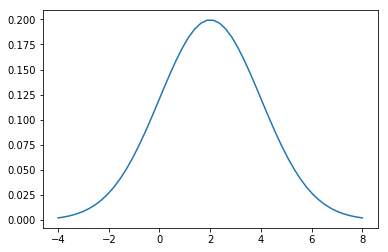

P(X <= 1) = 0.3085375387259869
P(|X-3| <= 1) = P(X-3 <= -1) + P(X-3 >= 1) = P(X <= 2) + P(X >= 4)  0.6586552539314571
P(-0.5 <= X <= 2.5) = 0.5069434479839316


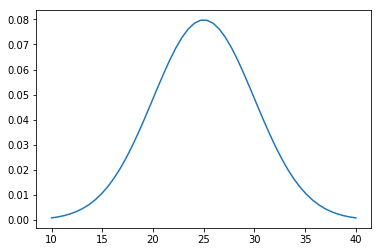

P(X >= u) = 0.1 --> u = 31.407757827723003
P(20 <= X <= u) = 0.5 --> u = 27.04397920609786
P(u < X) = 0.25 --> u = 28.372448750980407
Estimation: mu = 65.3447163119969, sigma = 15.3370993539776
0.5000000000000001


In [116]:
#2a)
mu = 2
sigma = 2
X = np.linspace(mu - 3*sigma, mu + 3*sigma)
plt.plot(X, st.norm.pdf(X, mu, sigma))
plt.show()

p1 = st.norm.cdf(1, mu, sigma)
print(f'P(X <= 1) = {p1}')

p2 = st.norm.cdf(2, mu, sigma) +  1 - st.norm.cdf(4, mu, sigma)
print(f'P(|X-3| <= 1) = P(X-3 <= -1) + P(X-3 >= 1) = P(X <= 2) + P(X >= 4)  {p2}') #TODO is this right?

p3 = st.norm.cdf(-.5, mu, sigma) + 1 - st.norm.cdf(2.5, mu, sigma)
print(f'P(-0.5 <= X <= 2.5) = {p3}')

#2b)
mu = 25
sigma = 5
X = np.linspace(mu - 3*sigma, mu + 3*sigma)
plt.plot(X, st.norm.pdf(X, mu, sigma))
plt.show()

u1 = st.norm.ppf(1 - .1, mu, sigma) #ppf is inverse of cdf
print(f'P(X >= u) = 0.1 --> u = {u1}')

u2 = st.norm.ppf(st.norm.cdf(20, mu, sigma) + .5, mu, sigma)
print(f'P(20 <= X <= u) = 0.5 --> u = {u2}')

u3 = st.norm.ppf(1 - .25, mu, sigma)
print(f'P(u < X) = 0.25 --> u = {u3}')


#2c) Estimate mean and std given 2 samples
z1 = st.norm.ppf(.25, 0, 1)
z2 = st.norm.ppf(.9, 0, 1)
u = sp.Symbol('u')
s = sp.Symbol('s')
sol = solve([u + z1 * s - 55, u + z2 * s - 85], u, s, dict=True)
print(f'Estimation: mu = {sol[0][u]}, sigma = {sol[0][s]}')

In [158]:
#3a)
#i.
X = [1, 2, 3, 4, 5, 6]
print(f'X element {X}')
#ii.
for x in X:
    # first param=amount of desired we want, M=total, n=amount of desired available, N=tries
    p = st.hypergeom.pmf(1, M=6, n=1, N=x)
    print(f'P({x}) = {p}') 
#iii.
st.hypergeom.mean(M=6, n=1, N=1) #TODO gibt es nicht mehere means und stds?

#3b)
#i.
pf = .5*.03 + .25*.04 + .25*.02
print(f'P(F) = {pf})')
#ii.
pm1_f = .03 * .5 / pf
print(f'P(M1 | F) = {pm1_f}')

X element [1, 2, 3, 4, 5, 6]
P(1) = 0.16666666666666669
P(2) = 0.33333333333333337
P(3) = 0.5000000000000004
P(4) = 0.6666666666666665
P(5) = 0.8333333333333335
P(6) = 1.0
P(F) = 0.030000000000000002)
P(M1 | F) = 0.49999999999999994


In [162]:
#4a)
print(f'P(key in last bag) = {.9}') #if he already looked through all but 1 bag, it is 100% in the last bag, given it's not lost
#4b)
#i.
print(f'P(Negative | Drunk) = {.05}')
#ii.
pp = .6 * .95 + .4 * .03
print(f'P(Positive) = {pp}')

#iii.
pd_p = .95 * .6 / pp
print(f'P(drunk | positive) = {pd_p}')

P(key in last bag) = 0.9
P(Negative | Drunk) = 0.05
P(Positive) = 0.582
P(drunk | positive) = 0.979381443298969


In [206]:
#5a)
s = np.array([0, 0, 0, 1])
#ii.
U = np.array([
    [0, 1/3, 1/3, 1/3],
    [1/3, 0, 1/3, 1/3],
    [1/3, 1/3, 0, 1/3],
    [1/3, 1/3, 1/3, 0]
])
#iii.
for n in range(0, 10):
    print(f'After {n}h: P(A) = {s.dot(U)[0]}')
    U = U.dot(U)
#iv.
print(U) # TODO is there a better way to check if there is a stationary distirbution than just loop a couple of times and check?

#5b)
P = np.array([
    [1, 0, 0, 0, 0],
    [.1, .1, 0, .6, .2],
    [.3, 0, .3, .3, .1],
    [.5, 0, 0, 0, .5],
    [0, 0, 0, 0, 1]
])
#ii.
# TODO how to calculate Absorbtionswahrscheinlichkeiten (for first state)
for i in range(10):
    P = P.dot(P)
    print(P)

After 0h: P(A) = 0.3333333333333333
After 1h: P(A) = 0.2222222222222222
After 2h: P(A) = 0.24691358024691357
After 3h: P(A) = 0.24996189605243102
After 4h: P(A) = 0.2499999941923567
After 5h: P(A) = 0.24999999999999983
After 6h: P(A) = 0.2499999999999999
After 7h: P(A) = 0.2499999999999998
After 8h: P(A) = 0.24999999999999964
After 9h: P(A) = 0.24999999999999928
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
[[1.   0.   0.   0.   0.  ]
 [0.41 0.01 0.   0.06 0.52]
 [0.54 0.   0.09 0.09 0.28]
 [0.5  0.   0.   0.   0.5 ]
 [0.   0.   0.   0.   1.  ]]
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.441e-01 1.000e-04 0.000e+00 6.000e-04 5.552e-01]
 [6.336e-01 0.000e+00 8.100e-03 8.100e-03 3.502e-01]
 [5.000e-01 0.000e+00 0.000e+00 0.000e+00 5.000e-01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]]
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.4444441e-01 1.0000000e-08 0.0000000e+00 6.0000000e-08 5.55

In [ ]:
#6)
